**Name:** <span style="color:red">Jan Izquierdo, Carmen Samedi</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 5
# Oscillations


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The aim of this practical is to explore the dynamics of oscillatory systems and the requirements for oscillations.

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

A. **Oscillations from a negative feedback: the Goodwin oscillator**

We will begin by studying the following two-dimensional system:
    
$\displaystyle{\frac{dx_1}{dt}=\frac{1}{1+x_2^n}-k_1\,x_1}$

$\displaystyle{\frac{dx_2}{dt}=x_1-k_2\,x_2}$

a) Consider that $k_1=k_2=0.1$. Is there any vaue of $n$ lower than 12 for which the system shows sustained oscillations?

b) For each of the previous cases, how does the system behave on the phase plane? (Draw the nullclines and plot the trajectory of the system on the phase plane.)



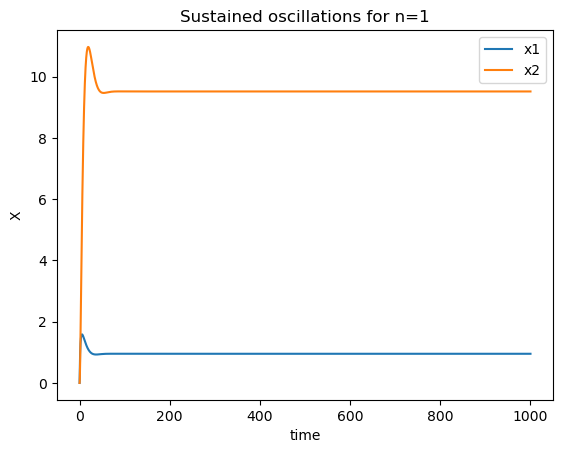

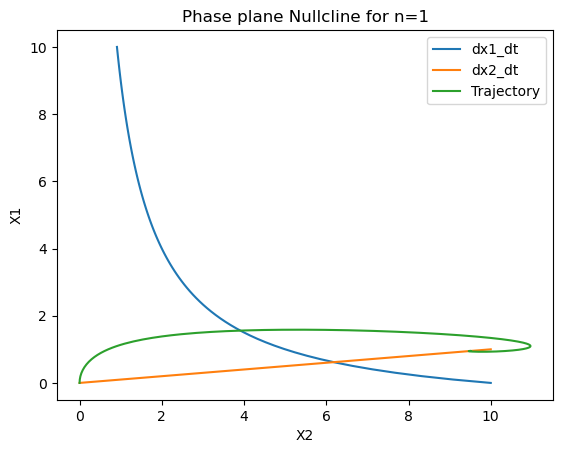

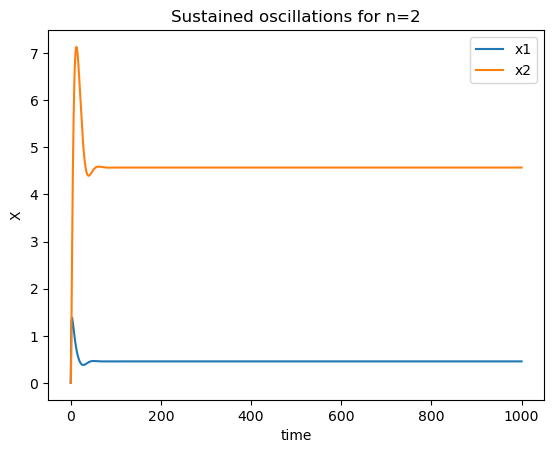

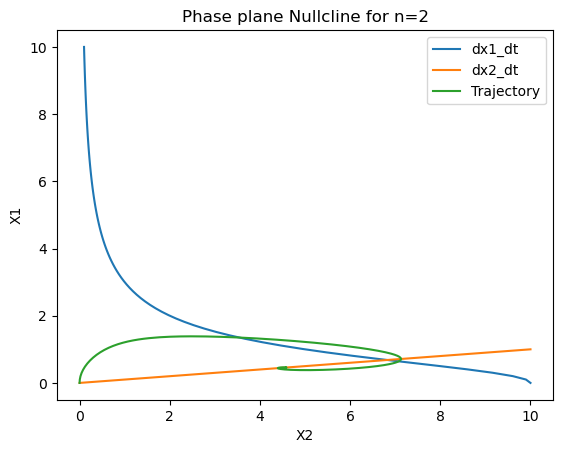

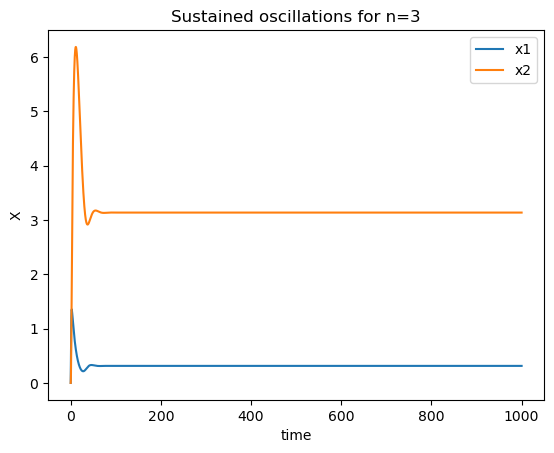

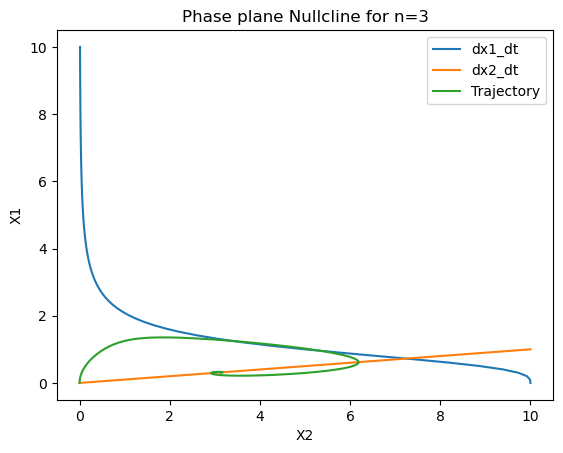

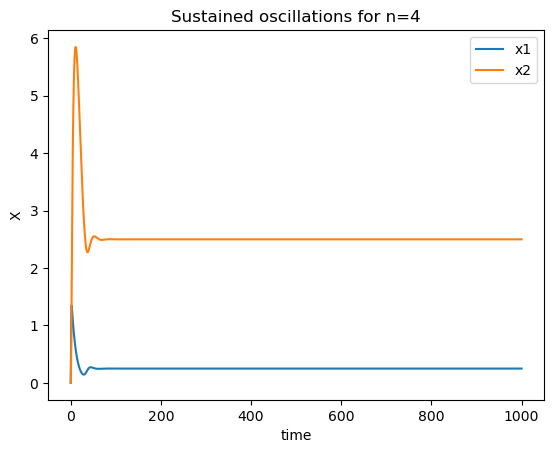

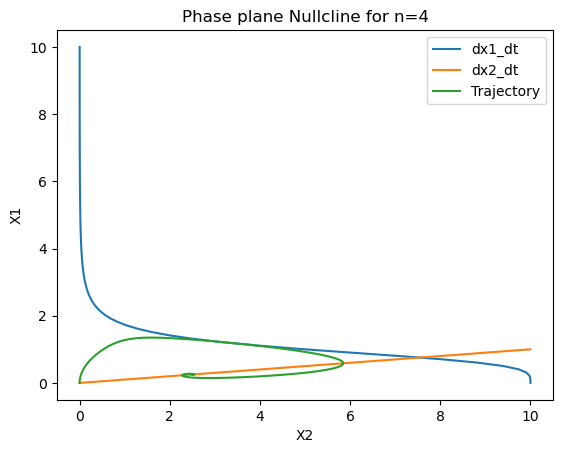

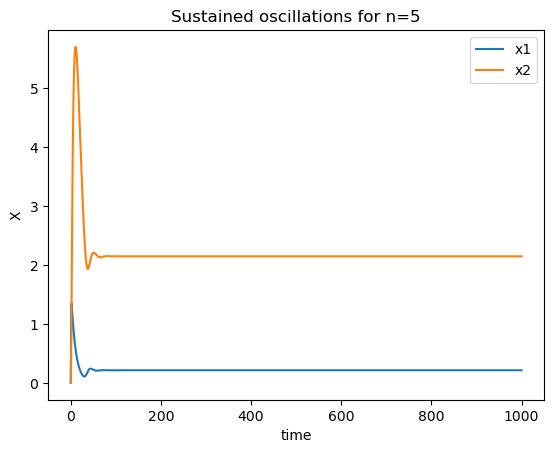

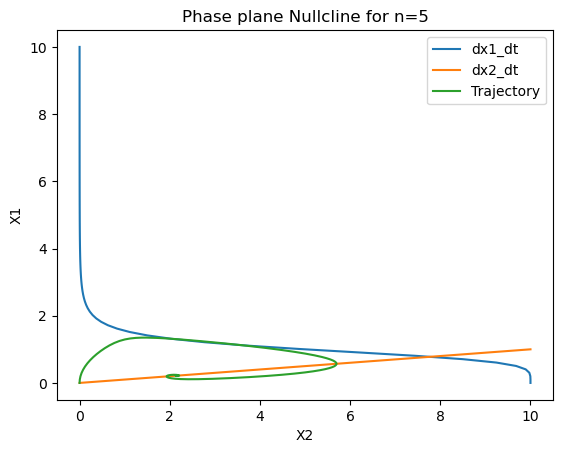

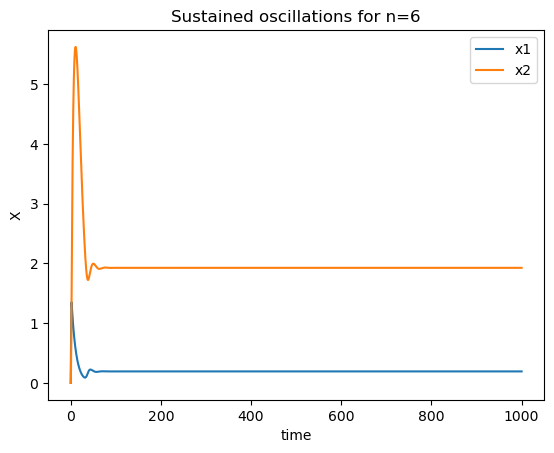

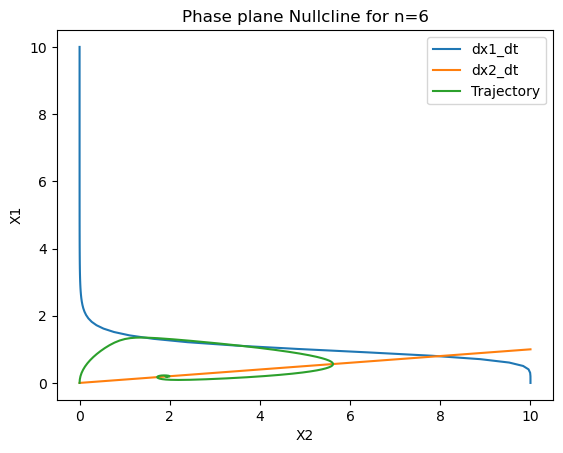

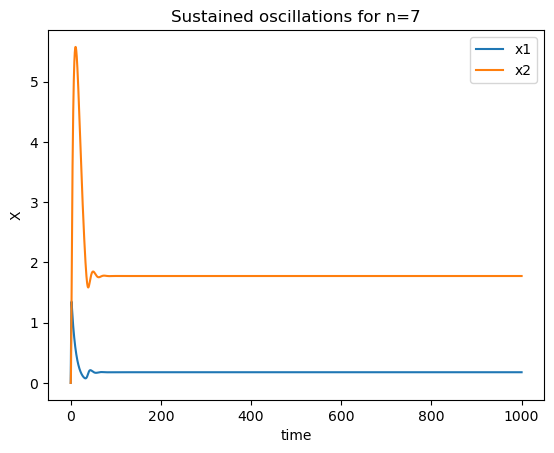

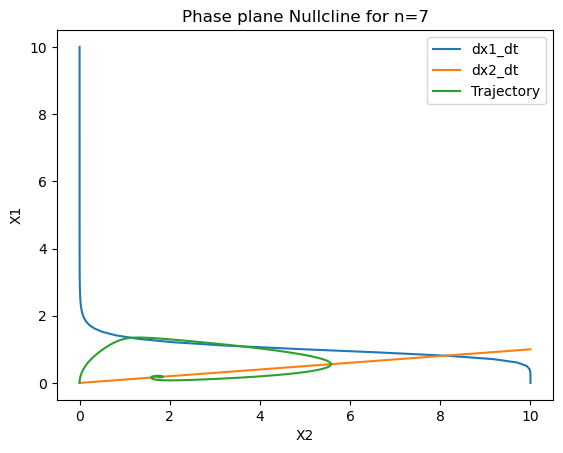

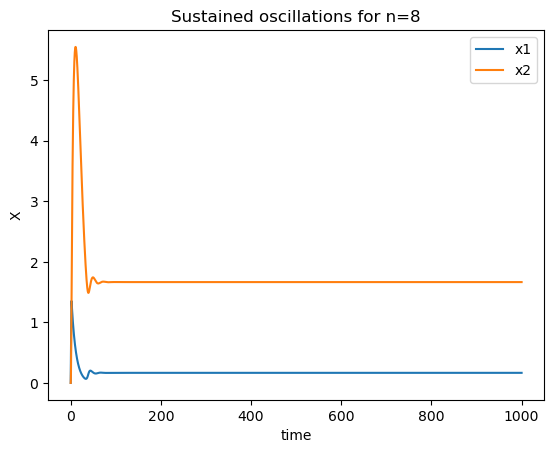

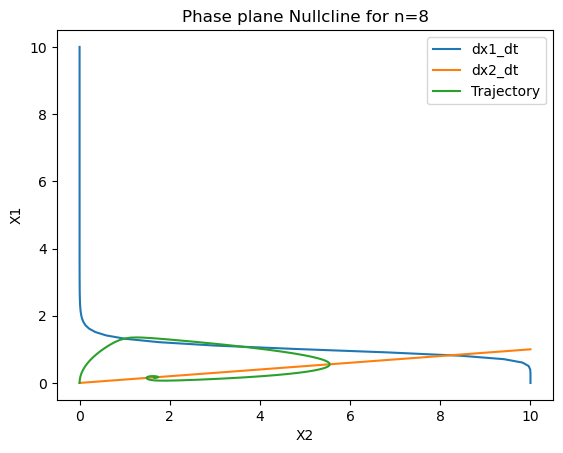

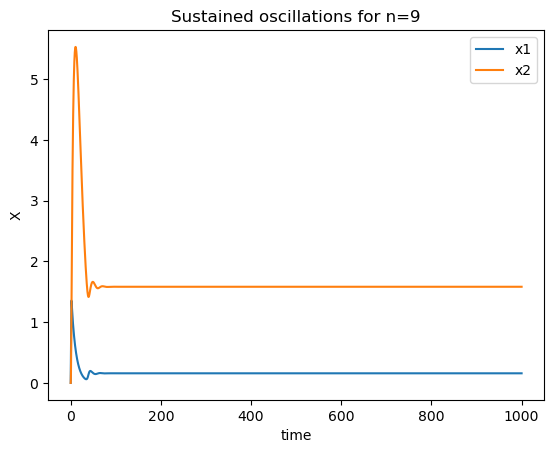

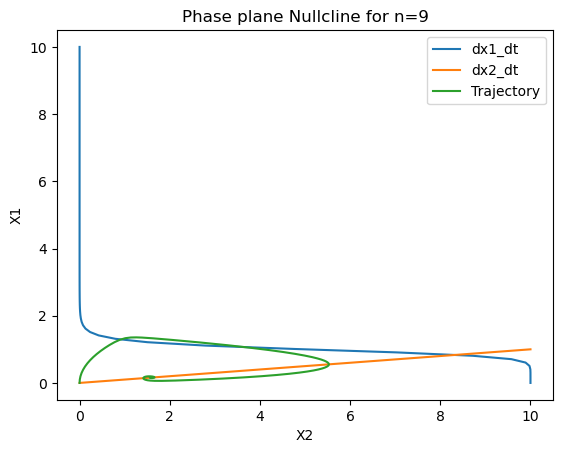

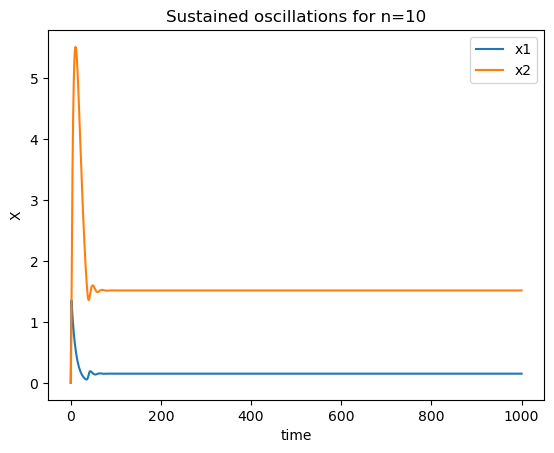

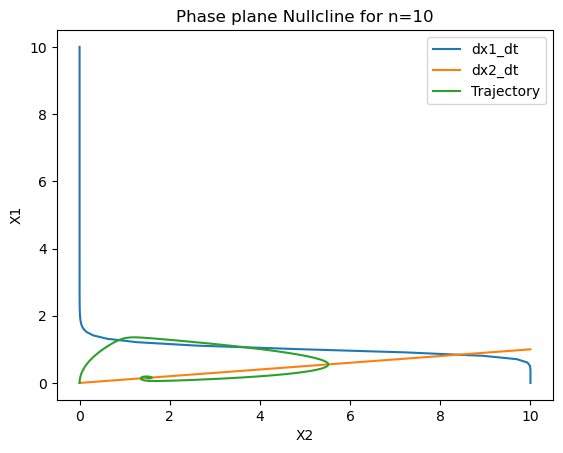

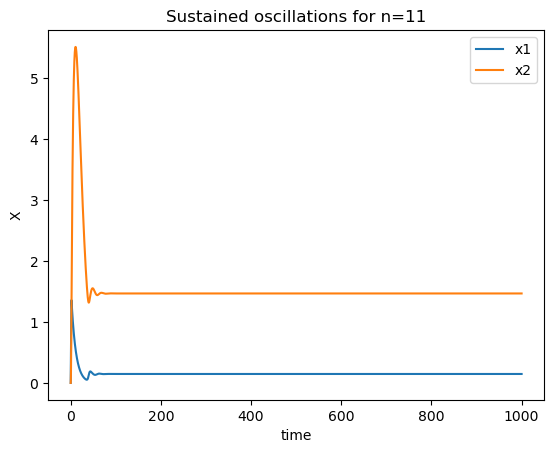

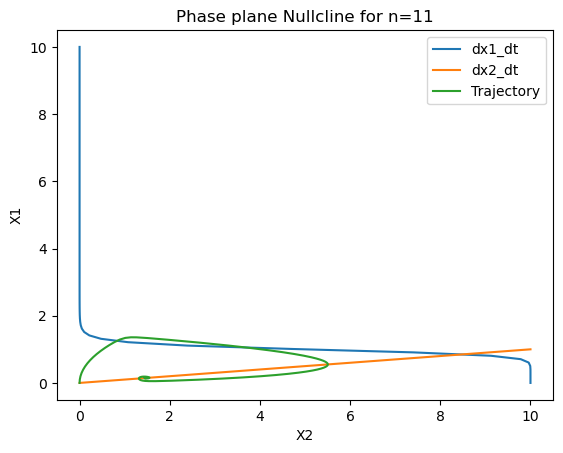

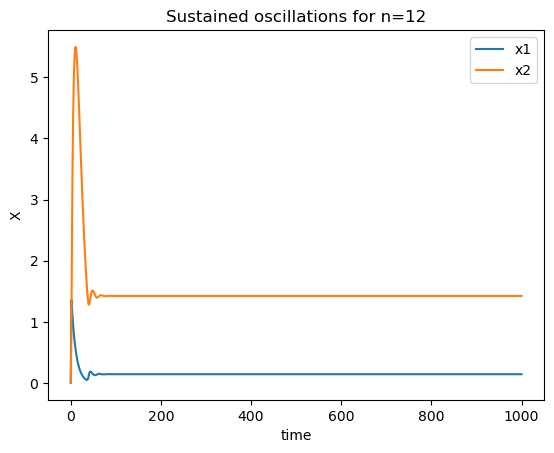

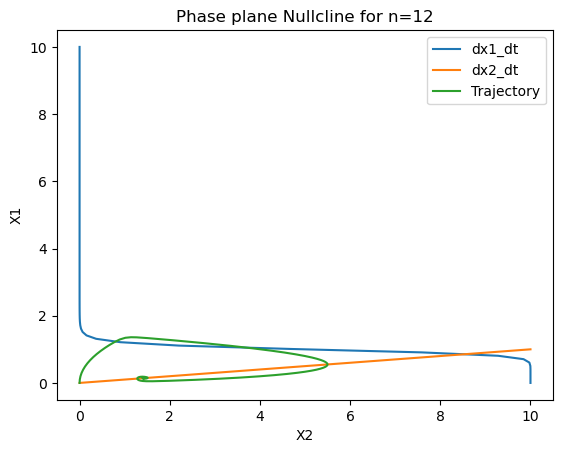

In [18]:
k1=k2=0.1

#X function
def Xosc(x_list, t):

    x1=x_list[0]
    x2=x_list[1]
    
    dx1_dt=1/(1+x2**n) - k1*x1
    dx2_dt=x1 - k2*x2

    return [dx1_dt, dx2_dt]

#dx function
def Dosc(n, x2_listD):

    x1_nullC1=1/(1 + x2_listD**n) / k1 #Nullcline 1 for X1
    x1_nullC2=k2*x2_listD #Nullcline2 for X1

    return x2_listD, x1_nullC1, x1_nullC2


#set eqs to 0 and solve for any variable (easiest one)
time=np.linspace(0, 1000, 10000)


#for loop for n
for n in range(1,13):

    #for X
    x1_list=[]
    x2_list=[]
    x0=[0, 0]
    res=odeint(Xosc, x0, time)
    for v in res:
        x1_list.append(v[0])
        x2_list.append(v[1])

    #dx
    x2_listD=np.linspace(0, 10, 100)
    x2_listD, x1_nullC1, x1_nullC2=Dosc(n, x2_listD)
    
    #print(x1_list)
    #print(x2_list)

    #Plot oscillations
    plt.plot(time, x1_list, label="x1")
    plt.plot(time, x2_list, label="x2")
    plt.title(f"Sustained oscillations for n={n}")
    plt.xlabel("time")
    plt.ylabel("X")
    plt.legend()
    plt.show()

    #Plot Nullclines
    plt.plot(x2_listD, x1_nullC1, label="dx1_dt") #dx1 as we take X1 for the X axis
    plt.plot(x2_listD, x1_nullC2, label="dx2_dt") #dx2 as we take X2 for the X axis
    plt.plot(x2_list, x1_list, label="Trajectory")#Course of x1 and x2 (x2 is x axis) (trajectory)
    plt.title(f"Phase plane Nullcline for n={n}")
    plt.xlabel("X2")
    plt.ylabel("X1")
    plt.legend()
    plt.show()

---

<span style="color:red">We can see there is no value lower than 12 for which the system shows sustained oscillations, it actually shows barely any oscillations at all. To achieve oscillations we need a more important feedback and very balanced parameters.The feedback we are giving is too weak and we observe a peak but there is not enough to sustain it so the system stabilises and reaches a steady state.
 This could be like a moderate or weak gene regulation might stabilize protein concentrations at a steady state rather than fluctuating in cycles. 
 As n increases the trajectory shrinks in the x2 axis, the decrese is specially noticeable from n=1 to n=3, from there on, the changes to trajectory are barely noticeable
 </span>

---

c) Now add a third variable $x_3$ that evolves according to:
    $\frac{dx_3}{dt}=x_2-k_3\,x_3$, with $k_3$=0.1,
and consider that $x_1$ is inhibited by $x_3$ instead of $x_2$.   
Is there now a value of $n$ for which the system shows sustained oscillations? (Make sure you integrate for sufficiently long time, it may help to plot the beginning and the final part of the simulation in different subplots.

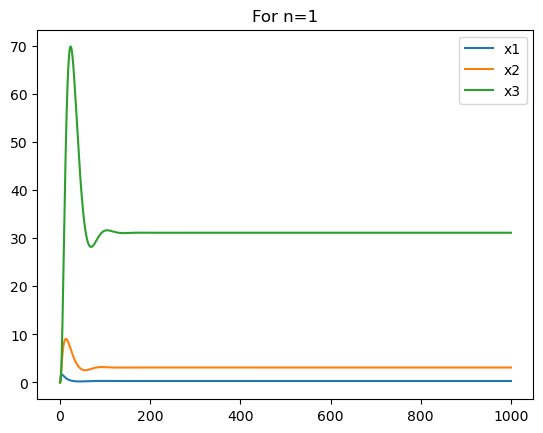

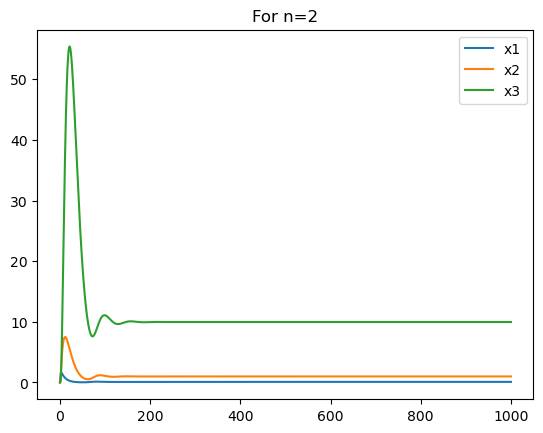

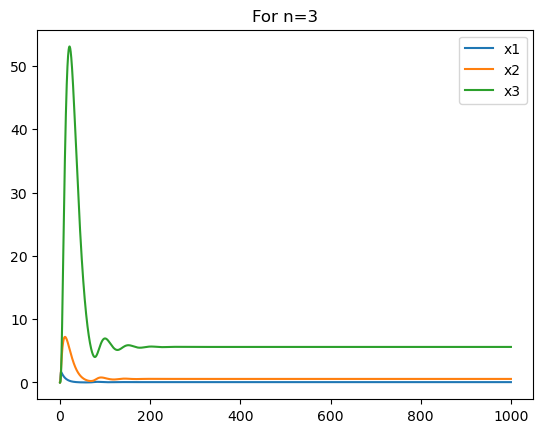

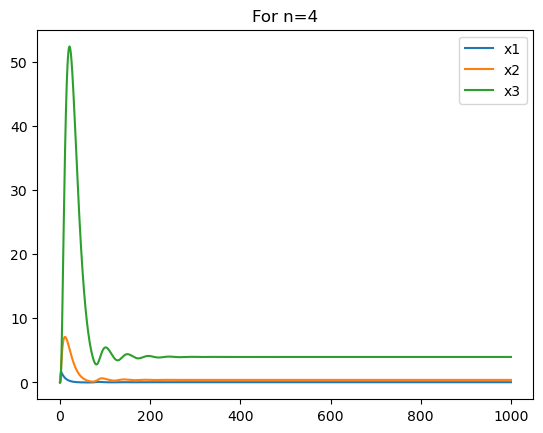

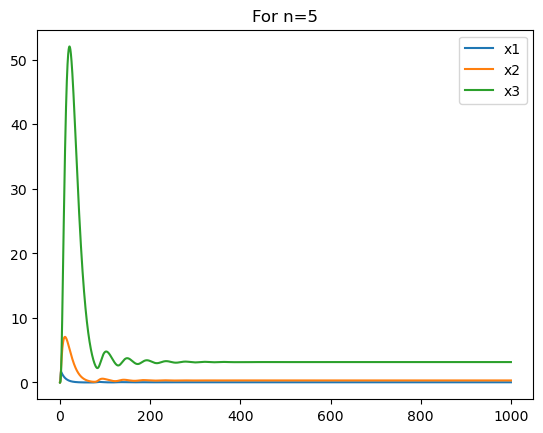

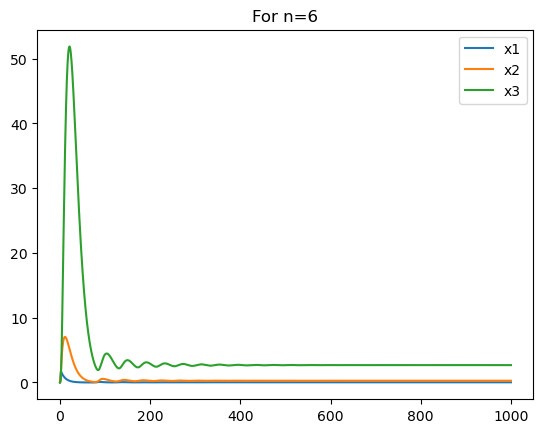

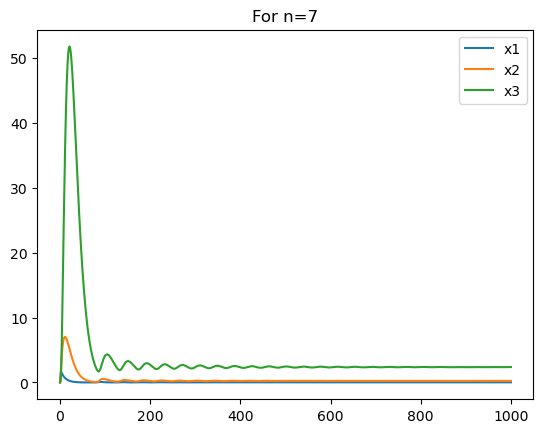

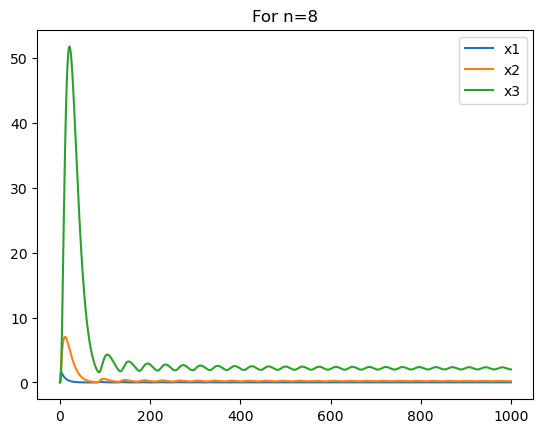

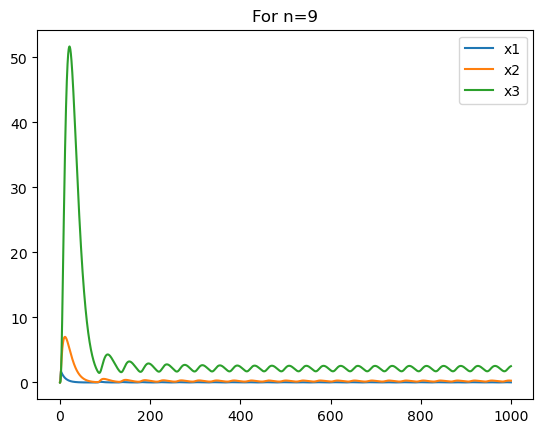

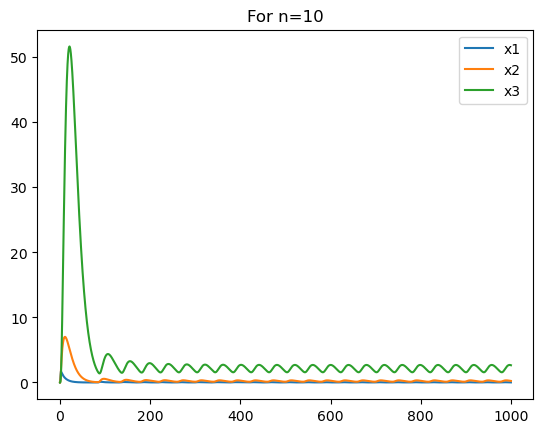

In [ ]:
# Write your code here

k1=k2=k3=0.1

def Xosc(x_list, t):
    x1=x_list[0]
    x2=x_list[1]
    x3= x_list[2]
    dx1_dt=1/(1+x3**n) - k1*x1
    dx2_dt=x1 - k2*x2
    dx3_dt= x2-k3*x3
    return [dx1_dt, dx2_dt, dx3_dt]

time=np.linspace(0, 1000, 10000)

#for loop for n
for n in range(1,11):
    x1_list=[]
    x2_list=[]
    x3_list =[]
    x0=[0, 0, 0]
    res=odeint(Xosc, x0, time)
    for v in res:
        x1_list.append(v[0])
        x2_list.append(v[1])
        x3_list.append(v[2])
    
    plt.plot(time, x1_list, label="x1")
    plt.plot(time, x2_list, label="x2")
    plt.plot(time, x3_list, label="x3")
    plt.title(f"For n={n}")
    plt.legend()
    plt.show()

---

<span style="color:red">We can see we finally have sustained oscillations (from n=8 and onward)! This 3 parameter function seems to have what our previous function was missing. The spike we observe in each plot shows the adjustment period of the system, then we finally reach the oscillations closer to the steady state. The spike is so big because my initial conditions are far from the steady state so the change is more drastic, this might not be very applicable in the real world. In this function, our system finally has enough feedback and balanced parameters to be able to reach the oscillations.  </span>

---

d) Add saturation to the degradation of $x_3$, with Michaelis constant K_d:

$$\frac{dx_3}{dt}=x_2-\frac{k_3\,x_3}{K_d+x_3}$$

Consider that $k_1=k_2=0.1$, $k_3=2$ and $K_d=0.01$. What do you observe now as $n$ increases? 



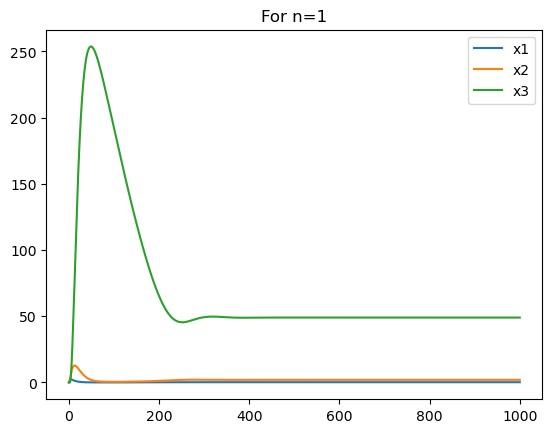

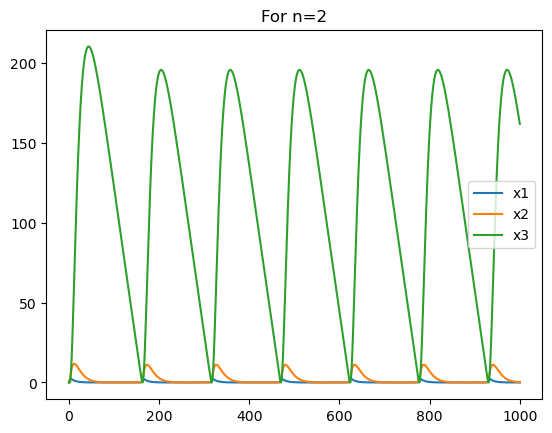

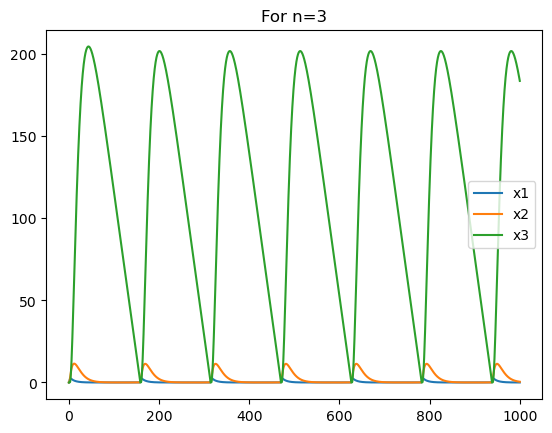

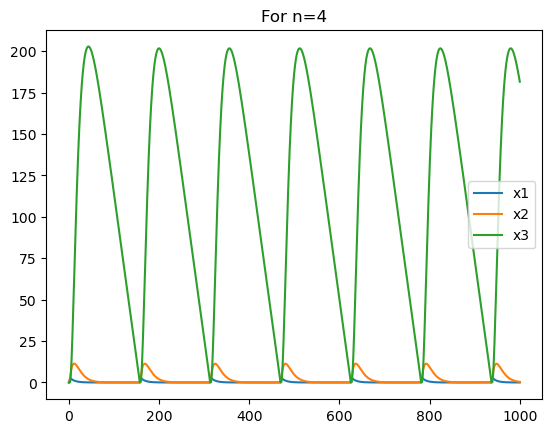

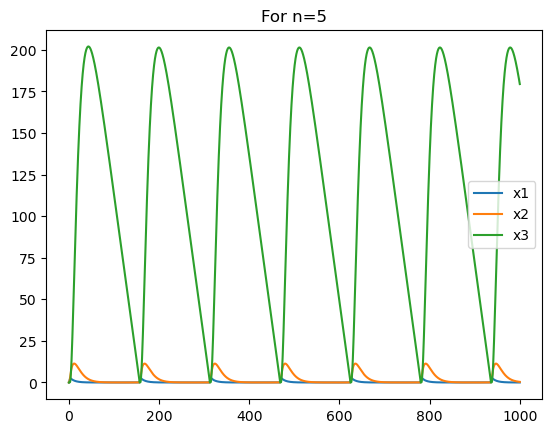

In [17]:
# Write your code here

k1=k2=0.1
k3= 2
K=0.01

def osc(x_list, t):
    x1=x_list[0]
    x2=x_list[1]
    x3= x_list[2]
    dx1_dt=1/(1+x3**n) - k1*x1
    dx2_dt=x1 - k2*x2
    dx3_dt= x2- ((k3*x3)/(K + x3))
    return [dx1_dt, dx2_dt, dx3_dt]

time=np.linspace(0, 1000, 10000)

#for loop for n
for n in range(1,6):
    x1_list=[]
    x2_list=[]
    x3_list =[]
    x0=[0, 0, 0]
    res=odeint(osc, x0, time)
    for v in res:
        x1_list.append(v[0])
        x2_list.append(v[1])
        x3_list.append(v[2])
    
    plt.plot(time, x1_list, label="x1")
    plt.plot(time, x2_list, label="x2")
    plt.plot(time, x3_list, label="x3")
    plt.title(f"For n={n}")
    plt.legend()
    plt.show()

---

<span style="color:red">

 We can see that with the N=1 there are no oscillations, we reach the steady state after the small spike. Then as we increase N to 2 and 3 we immediately see oscillations for both x2 and X3. From 2 to 3 we reach a bit more of a regular cycle of oscillations. After three, it seems as though the n increasing does not change much. 
 Comparing this to the previous graph, the oscillations are bigger, it seems as though their amplitude increased when we degrade x3. Adding a degradation creates a delayed effect which explains our ample oscillatoy behaviour. This model could easily represent a strong feedback and stable system.

B. **Oscillations from a single intermediate**

A negative feedback system can oscillate even with only one intermediate, if there are enough nonlinearities in the system. To see this, consider again the initial 2D system, but assume that there is an additional pathway of $x_2$ degradation that can saturate and whose activity is inhibited by high $x_2$ values. $x_2$ dynamics is now described by the following ODE:

 $\displaystyle{\frac{dx_2}{dt}}=x_1-k_2\,x_2-\displaystyle{\frac{k_3\,x_2}{K_m+x_2+x_2^2}}$

a) Plot the time evolution of the system for $k_1=k_2=0.1$, $k_3=5$, $n=2$, $K_m=0.1$.

b) Increase $K_m$ up to 10. What happens?

c) Plot the nullclines of the system and superimpose the corresponding trajectories. What do you observe?

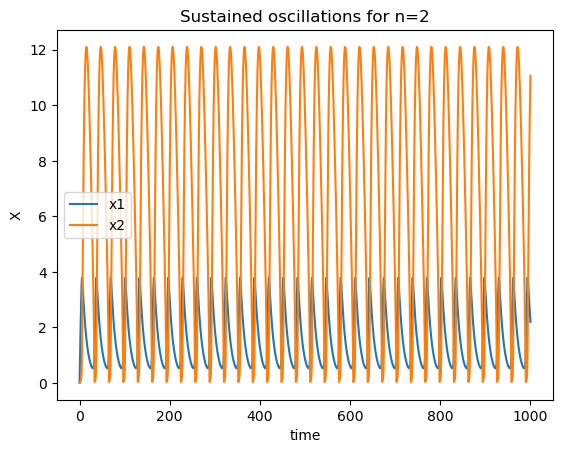

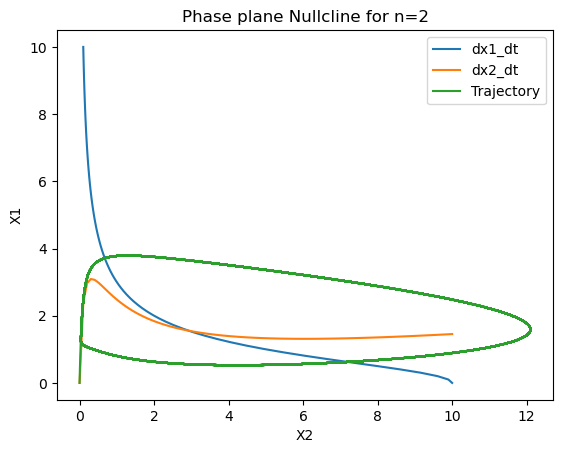

In [21]:
k1=k2=0.1
k3=5
K=0.1


def Xosc(x_list, t):
    x1=x_list[0]
    x2=x_list[1]
    dx1_dt=1/(1+x2**n) - k1*x1
    dx2_dt=x1 - (k2*x2) - ((k3*x2)/(K+x2+x2**2))

    return [dx1_dt, dx2_dt]

#dx function
def Dosc(n, x2_listD):
    # Nullcline for dx1/dt = 0
    x1_nullC1 = 1 / (1 + x2_listD**n) / k1  # Nullcline 1 for X1

    # Nullcline for dx2/dt = 0 (modified)
    x1_nullC2 = k2 * x2_listD + (k3 * x2_listD) / (K + x2_listD + x2_listD**2)  # Nullcline 2 for X1
    
    return x2_listD, x1_nullC1, x1_nullC2



#set eqs to 0 and solve for any variable (easiest one)
time=np.linspace(0, 1000, 10000)

n=2
#for X
x1_list=[]
x2_list=[]
x0=[0, 0]
res=odeint(Xosc, x0, time)
for v in res:
    x1_list.append(v[0])
    x2_list.append(v[1])

#dx
x2_listD=np.linspace(0, 10, 100)
x2_listD, x1_nullC1, x1_nullC2=Dosc(n, x2_listD)

#print(x1_list)
#print(x2_list)

#Plot oscillations
plt.plot(time, x1_list, label="x1")
plt.plot(time, x2_list, label="x2")
plt.title(f"Sustained oscillations for n={n}")
plt.xlabel("time")
plt.ylabel("X")
plt.legend()
plt.show()

#Plot Nullclines
plt.plot(x2_listD, x1_nullC1, label="dx1_dt") #dx1 as we take X1 for the X axis
plt.plot(x2_listD, x1_nullC2, label="dx2_dt") #dx2 as we take X2 for the X axis
plt.plot(x2_list, x1_list, label="Trajectory")#Course of x1 and x2 (x2 is x axis) (trajectory)
plt.title(f"Phase plane Nullcline for n={n}")
plt.xlabel("X2")
plt.ylabel("X1")
plt.legend()
plt.show()

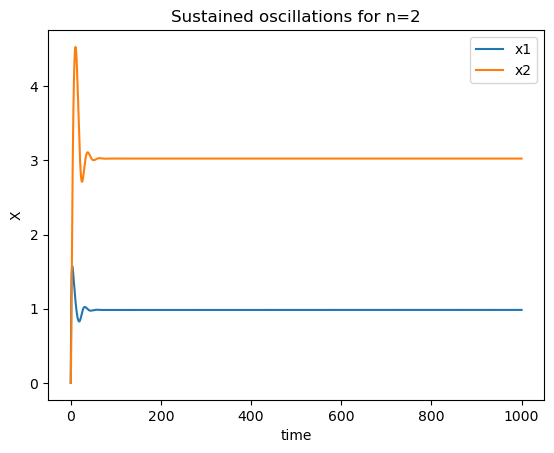

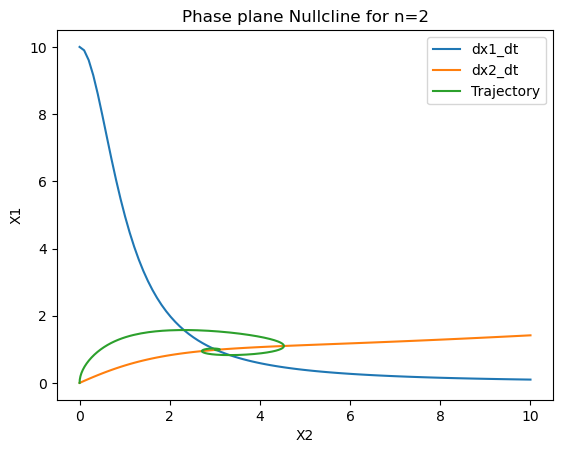

In [23]:
time=np.linspace(0, 1000, 10000)
K=10
n=2
#for X
x1_list=[]
x2_list=[]
x0=[0, 0]
res=odeint(Xosc, x0, time)
for v in res:
    x1_list.append(v[0])
    x2_list.append(v[1])

#dx
x2_listD=np.linspace(0, 10, 100)
x2_listD, x1_nullC1, x1_nullC2=Dosc(n, x2_listD)

#print(x1_list)
#print(x2_list)

#Plot oscillations
plt.plot(time, x1_list, label="x1")
plt.plot(time, x2_list, label="x2")
plt.title(f"Sustained oscillations for n={n}")
plt.xlabel("time")
plt.ylabel("X")
plt.legend()
plt.show()

#Plot Nullclines
plt.plot(x2_listD, x1_nullC1, label="dx1_dt") #dx1 as we take X1 for the X axis
plt.plot(x2_listD, x1_nullC2, label="dx2_dt") #dx2 as we take X2 for the X axis
plt.plot(x2_list, x1_list, label="Trajectory")#Course of x1 and x2 (x2 is x axis) (trajectory)
plt.title(f"Phase plane Nullcline for n={n}")
plt.xlabel("X2")
plt.ylabel("X1")
plt.legend()
plt.show()

---

<span style="color:red">The bigger Km is the greater the radius of the trajectory, meeting the nullclines of both which would be the steady state. In Km 0.1 the system has trouble reaching a final state. In the nullcline of this K is more circular which could be due to a delayed feedback or no degradation. As Km increases the system is more sensitive and the oscillations are non existant but the system in the nullclines shows that we reach an equilibrium. </span>

---